In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
from constants import *

###  Agile Octopus London Home Electricity Prices, pounds per kilowatt-hour
Source: [My Smart Energy](https://mysmartenergy.uk/Download-Data/London)

If you have your half hourly consumption data from your smart meter you can use this Agile Octopus Prices file to check what your bill would be with this tariff. Both Local (including British Summer Time) and UTC (GMT) times are shown, please choose the correct column when matching to your consumption data. Prices are shown both with and without VAT added. When comparing bills please also note the daily standing charges.

#### Each 24 hour day would have two half hour measurements, so 48 data points in a day 


In [2]:
half_hourly_prices = pd.read_csv(f"{DATA_FOLDER}/agile_octopus_london.csv")
half_hourly_prices.head()


,Valid_From_UTC,Valid_To_UTC,Valid_From_Local,Valid_To_Local,Price_Inc_VAT,Price_Ex_VAT
0,9/29/22 4:30,9/29/22 5:00,9/29/22 5:30,9/29/22 6:00,38.38,36.55
1,9/29/22 5:00,9/29/22 5:30,9/29/22 6:00,9/29/22 6:30,37.80,36.00
2,9/29/22 5:30,9/29/22 6:00,9/29/22 6:30,9/29/22 7:00,54.85,52.24
3,9/29/22 6:00,9/29/22 6:30,9/29/22 7:00,9/29/22 7:30,48.38,46.08
4,9/29/22 6:30,9/29/22 7:00,9/29/22 7:30,9/29/22 8:00,55.00,52.38


In [3]:
len(half_hourly_prices)

31207

In [4]:
date_column= 'Valid_From_UTC'
data_column = 'Price_Ex_VAT'
half_hourly_prices[date_column] = pd.to_datetime(half_hourly_prices[date_column])


/var/folders/v1/24qfth9s4hd8jjscffmwx4yw0000gn/T/ipykernel_5345/238797309.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  half_hourly_prices[date_column] = pd.to_datetime(half_hourly_prices[date_column])


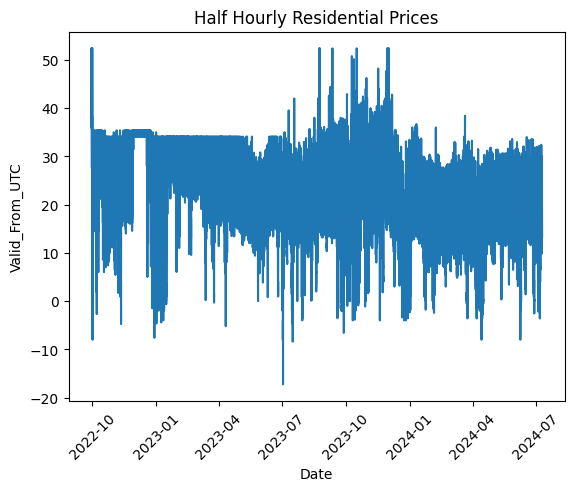

In [5]:
# Graph the daily average system price from 2020 to June 2024

plt.plot(half_hourly_prices[date_column], half_hourly_prices[data_column])
plt.xlabel('Date')
plt.ylabel(date_column)
plt.title('Half Hourly Residential Prices')
plt.xticks(rotation=45)
plt.show()


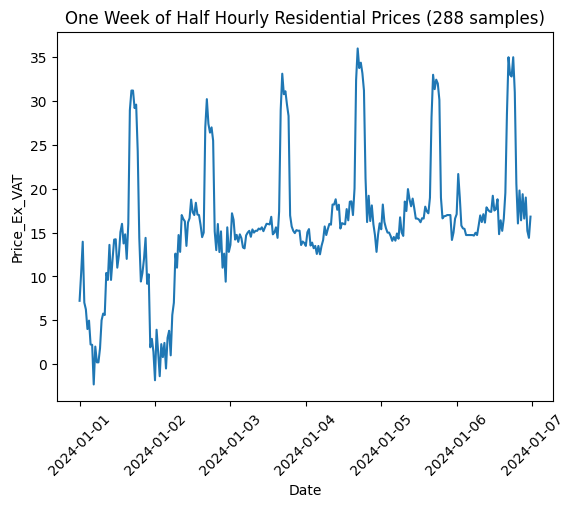

In [19]:
start_date = '2024-01-01'
end_date = '2024-01-07'

filtered_data = half_hourly_prices[(half_hourly_prices[date_column] >= start_date) & (half_hourly_prices[date_column] < end_date)]
num_data_points = len(filtered_data)

plt.plot(filtered_data[date_column], filtered_data[data_column])
plt.xlabel('Date')
plt.ylabel(data_column)
plt.title(f'One Week of Half Hourly Residential Prices ({num_data_points} samples)')
plt.xticks(rotation=45)
plt.savefig("results/plots/one_week.png", dpi=300)
plt.show()

In [7]:
def get_data_stats(data):
    #print(data)
    return data.describe()

## Alpha

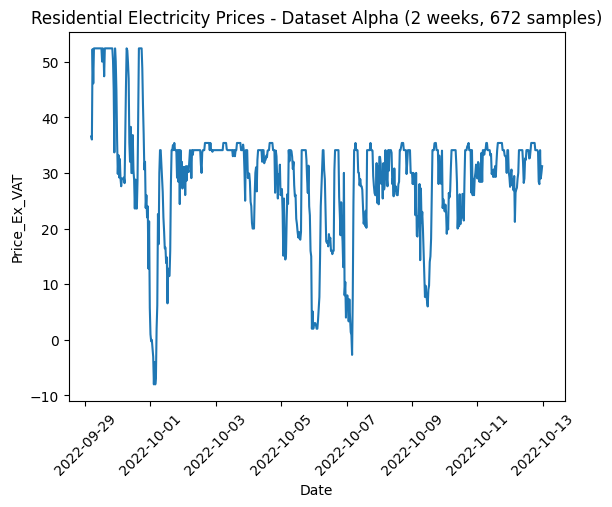

count    663.000000
mean      29.495732
std       10.463973
min       -8.000000
25%       26.000000
50%       31.800000
75%       34.090000
max       52.380000
Name: Price_Ex_VAT, dtype: float64


In [16]:
start_date = '2022-09-29'
end_date = '2022-10-13'

filtered_data = half_hourly_prices[(half_hourly_prices[date_column] >= start_date) & (half_hourly_prices[date_column] < end_date)]
num_data_points = len(filtered_data)

plt.plot(filtered_data[date_column], filtered_data[data_column])
plt.xlabel('Date')
plt.ylabel(data_column)
plt.title(f'Residential Electricity Prices - Dataset Alpha (2 weeks, {672} samples)')
plt.xticks(rotation=45)
plt.savefig("results/plots/alpha.png", dpi=300)
plt.show()

print(get_data_stats(filtered_data[data_column]))

## Beta

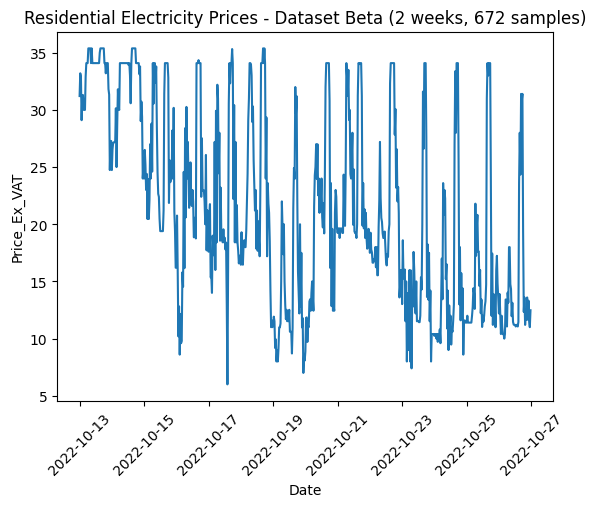

count    672.000000
mean      21.488482
std        8.501937
min        6.000000
25%       13.600000
50%       19.810000
75%       30.000000
max       35.380000
Name: Price_Ex_VAT, dtype: float64


In [17]:
start_date = '2022-10-13'
end_date = '2022-10-27'

filtered_data = half_hourly_prices[(half_hourly_prices[date_column] >= start_date) & (half_hourly_prices[date_column] < end_date)]
num_data_points = len(filtered_data)

plt.plot(filtered_data[date_column], filtered_data[data_column])
plt.xlabel('Date')
plt.ylabel(data_column)
plt.title(f'Residential Electricity Prices - Dataset Beta (2 weeks, {num_data_points} samples)')
plt.xticks(rotation=45)
plt.savefig("results/plots/beta.png", dpi=300)
plt.show()

print(get_data_stats(filtered_data[data_column]))

## Delta

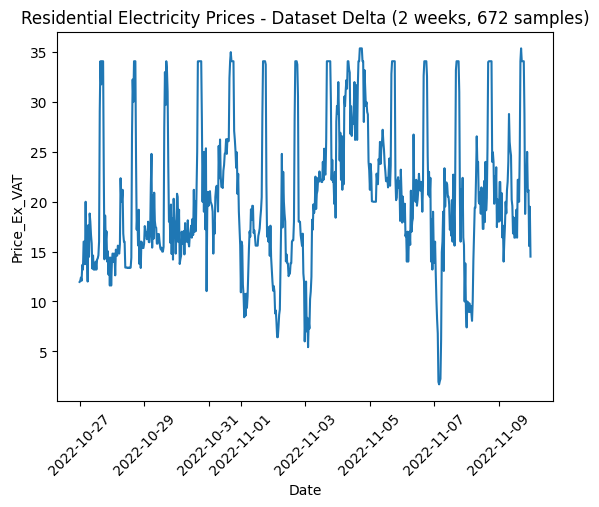

count    672.000000
mean      20.512039
std        7.146095
min        1.690000
25%       15.785000
50%       19.600000
75%       24.155000
max       35.380000
Name: Price_Ex_VAT, dtype: float64


In [18]:
start_date = '2022-10-27'
end_date = '2022-11-10'

filtered_data = half_hourly_prices[(half_hourly_prices[date_column] >= start_date) & (half_hourly_prices[date_column] < end_date)]
num_data_points = len(filtered_data)

plt.plot(filtered_data[date_column], filtered_data[data_column])
plt.xlabel('Date')
plt.ylabel(data_column)
plt.title(f'Residential Electricity Prices - Dataset Delta (2 weeks, {num_data_points} samples)')
plt.xticks(rotation=45)
plt.savefig("results/plots/delta.png", dpi=300)
plt.show()

print(get_data_stats(filtered_data[data_column]))

## One Week of Context

= = = > Chronos pipeline not initialized. Firing up chronos-t5-tiny-336-48-20_000-alpha pipeline. May take time..
Version is chronos-t5-tiny-336-48-20_000-alpha


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/homebrew/lib/python3.12/site-packages/transformers/generation/logits_process.py:156: UserWarning: The operator 'aten::isin.Tensor_Tensor_out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:13.)
  eos_token_mask = torch.isin(vocab_tensor, eos_token_id)


chronos-t5-tiny-336-48-20_000-alpha

Results comparison for Price_Ex_VAT:

MSE
- chronos-t5-tiny-336-48-20_000-alpha MSE: 56.395876541366626
NMSE
- chronos-t5-tiny-336-48-20_000-alpha NMSE: 1.6955401487677018



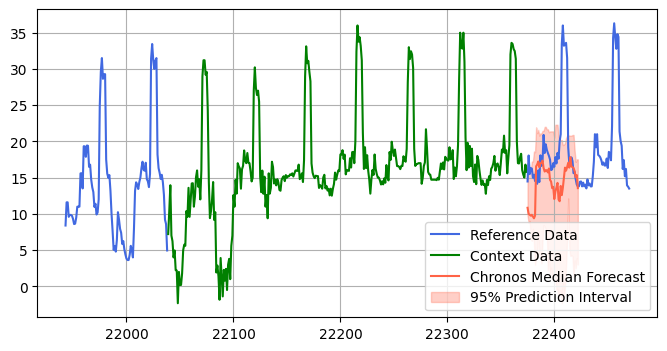

In [11]:
start_date = '2024-01-01'
end_date = '2024-01-08'
prediction_length = 48
date_column
_ = utils.compare_prediction_methods(half_hourly_prices,data_column, date_column,start_date,end_date,prediction_length,methods=['chronos-t5-tiny-336-48-20_000-alpha'],run_name="one_week")


= = = > Chronos pipeline not initialized. Firing up chronos_tiny pipeline. May take time..
Version is chronos_tiny
chronos_tiny
= = = > Chronos pipeline not initialized. Firing up chronos_mini pipeline. May take time..
Version is chronos_mini
chronos_mini


/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


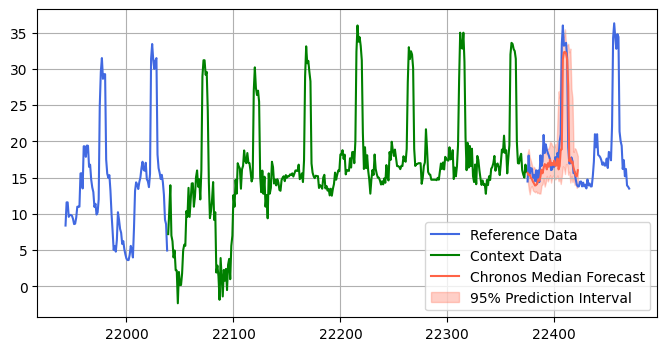

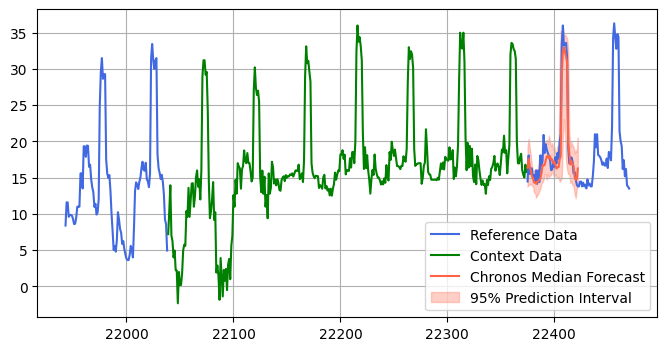

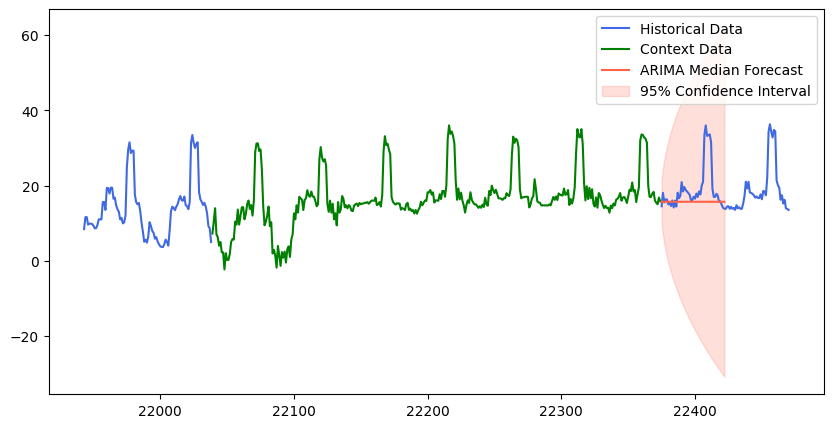

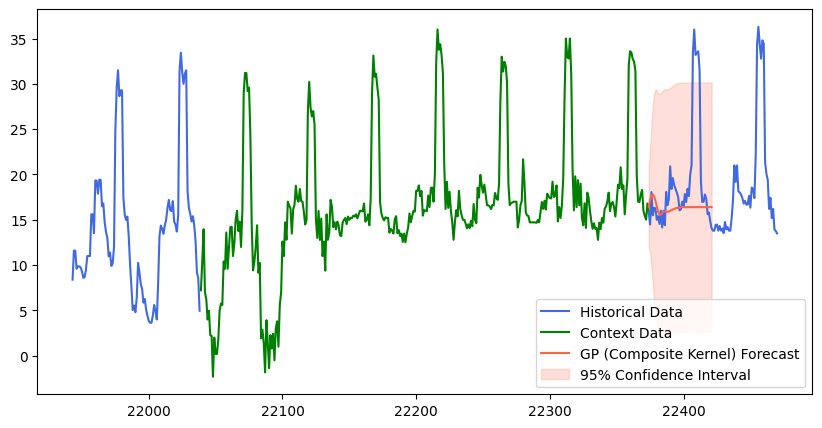

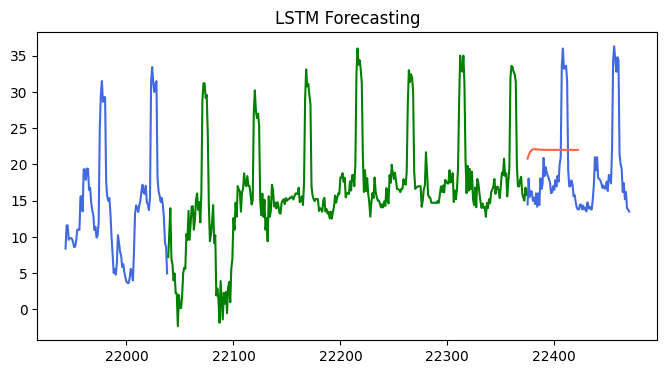


Results comparison for Price_Ex_VAT:

MSE
- chronos_tiny MSE: 8.610365696391996
- chronos_mini MSE: 2.6252980170719797
- arima MSE: 44.15473405320429
- gp MSE: 40.241242055653515
- lstm MSE: 42.03214529930926
NMSE
- chronos_tiny NMSE: 0.25887035771305383
- chronos_mini NMSE: 0.07892949739261043
- arima NMSE: 1.327510607809308
- gp NMSE: 1.209851601323944
- lstm NMSE: 1.2636950476608284



In [12]:

_ = utils.compare_prediction_methods(half_hourly_prices,data_column, date_column,start_date,end_date,prediction_length,methods=['chronos_tiny','chronos_mini','arima','gp','lstm'],run_name="one_week")

## Two Weeks of Context

= = = > Chronos pipeline not initialized. Firing up chronos_tiny pipeline. May take time..
Version is chronos_tiny


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


chronos_tiny
= = = > Chronos pipeline not initialized. Firing up chronos_mini pipeline. May take time..
Version is chronos_mini
chronos_mini


/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


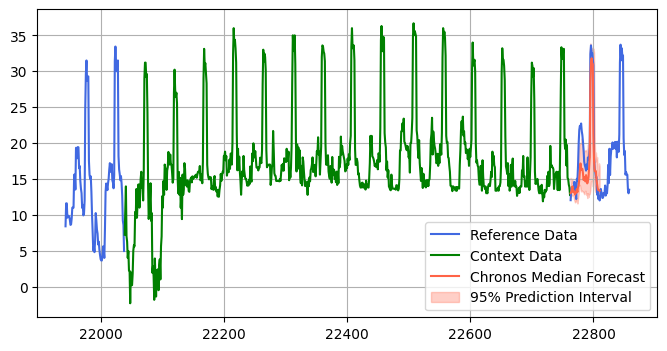

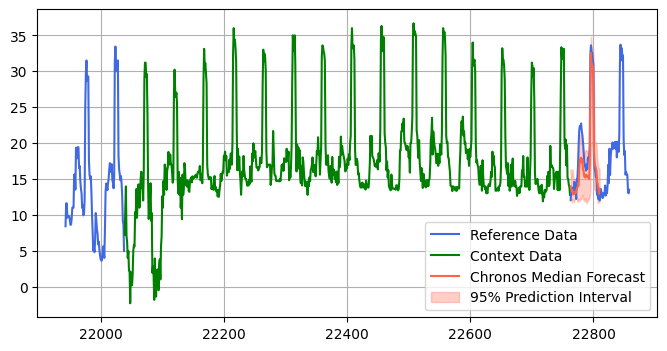

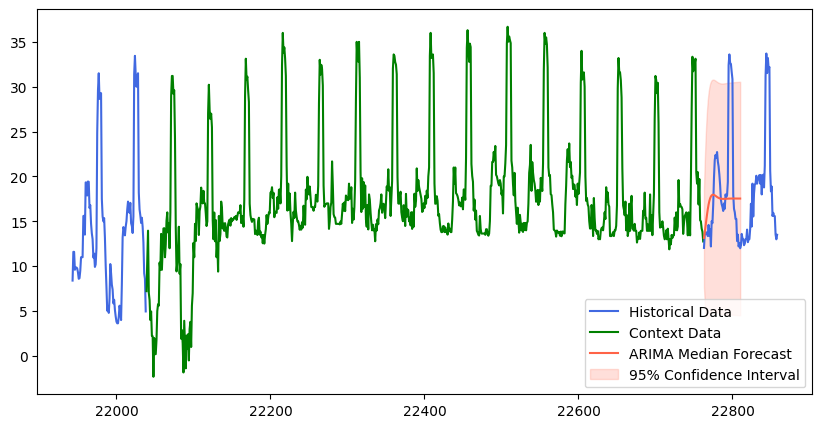

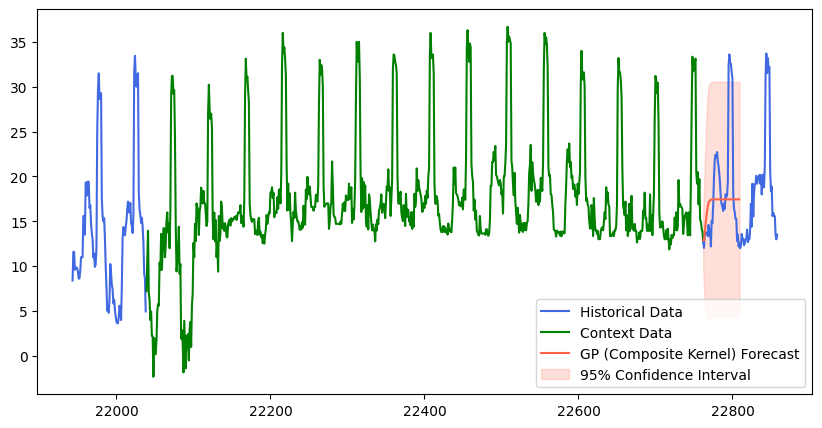

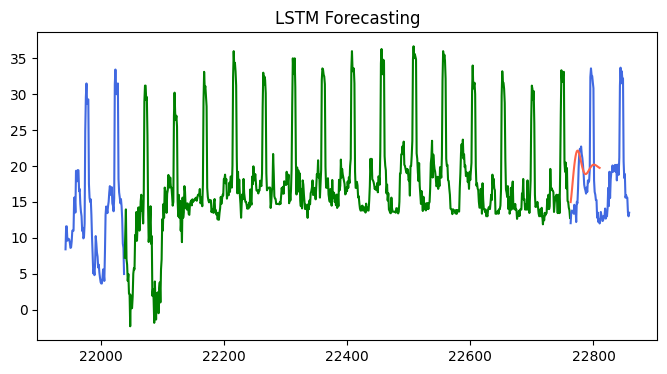


Results comparison for Price_Ex_VAT:

MSE
- chronos_tiny MSE: 9.513411494159266
- chronos_mini MSE: 6.189266958066871
- arima MSE: 34.85390561812266
- gp MSE: 35.0456419262157
- lstm MSE: 36.63692249172533
NMSE
- chronos_tiny NMSE: 0.2626920761202021
- chronos_mini NMSE: 0.17090308643486665
- arima NMSE: 0.9624144643951782
- gp NMSE: 0.967708843690293
- lstm NMSE: 1.0116485803137



In [13]:
start_date = '2024-01-01'
end_date = '2024-01-16'
prediction_length = 48

_ = utils.compare_prediction_methods(half_hourly_prices,data_column, date_column,start_date,end_date,prediction_length,methods=['chronos_tiny','chronos_mini','arima','gp','lstm'],run_name="two_weeks")

# Three Weeks of Context

= = = > Chronos pipeline not initialized. Firing up chronos_tiny pipeline. May take time..
Version is chronos_tiny


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


chronos_tiny
= = = > Chronos pipeline not initialized. Firing up chronos_mini pipeline. May take time..
Version is chronos_mini
chronos_mini


/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


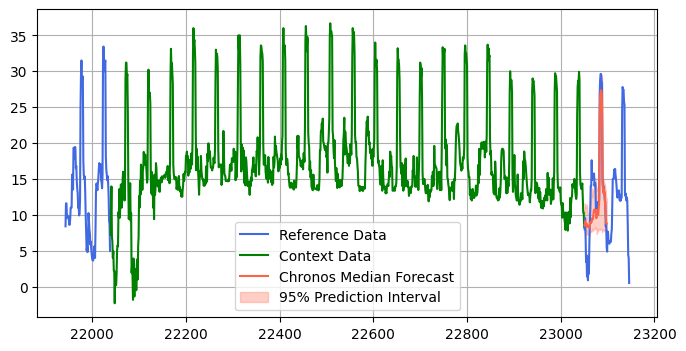

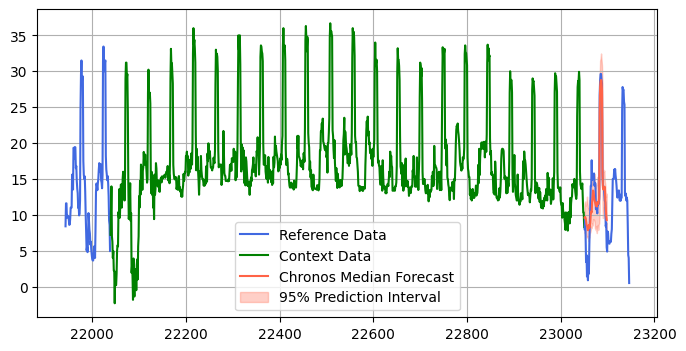

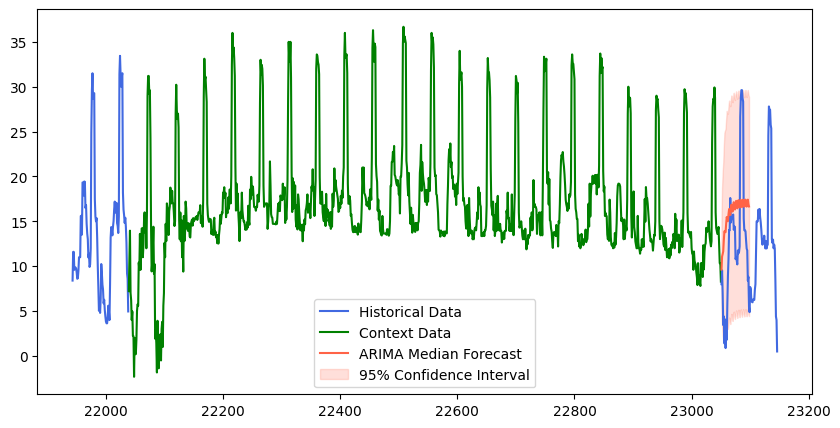

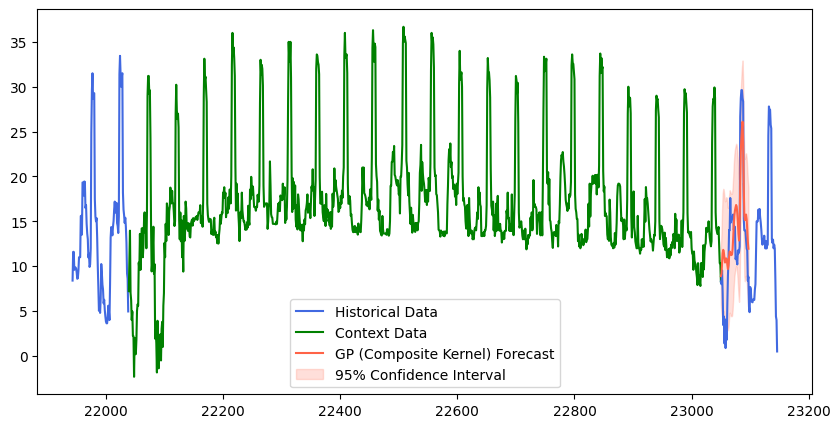

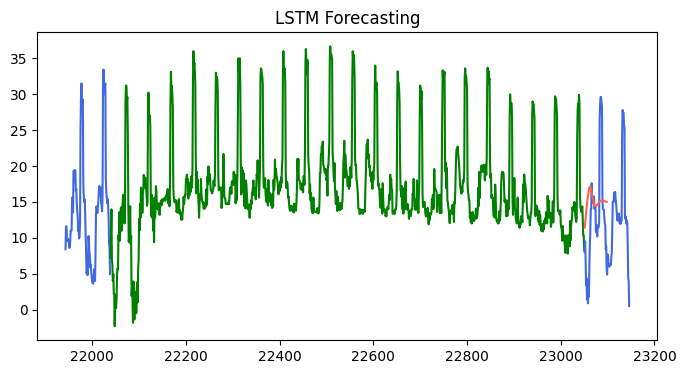


Results comparison for Price_Ex_VAT:

MSE
- chronos_tiny MSE: 13.169804424208268
- chronos_mini MSE: 8.991478523794562
- arima MSE: 52.69045840312504
- gp MSE: 29.187699707658453
- lstm MSE: 58.49497192738904
NMSE
- chronos_tiny NMSE: 0.2477124048554738
- chronos_mini NMSE: 0.16912178014134743
- arima NMSE: 0.9910610471924347
- gp NMSE: 0.548994886628177
- lstm NMSE: 1.1002388267400602



In [14]:
start_date = '2024-01-01'
end_date = '2024-01-22'
prediction_length = 48

_ = utils.compare_prediction_methods(half_hourly_prices,data_column, date_column,start_date,end_date,prediction_length,methods=['chronos_tiny','chronos_mini','arima','gp','lstm'],run_name="three_weeks")

# One Month of Context

= = = > Chronos pipeline not initialized. Firing up chronos_tiny pipeline. May take time..
Version is chronos_tiny


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


chronos_tiny
= = = > Chronos pipeline not initialized. Firing up chronos_mini pipeline. May take time..
Version is chronos_mini
chronos_mini


/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


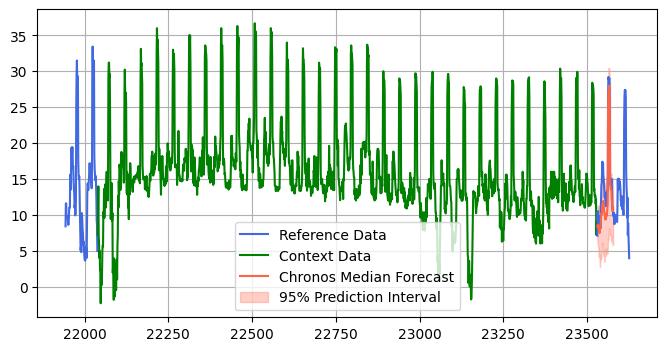

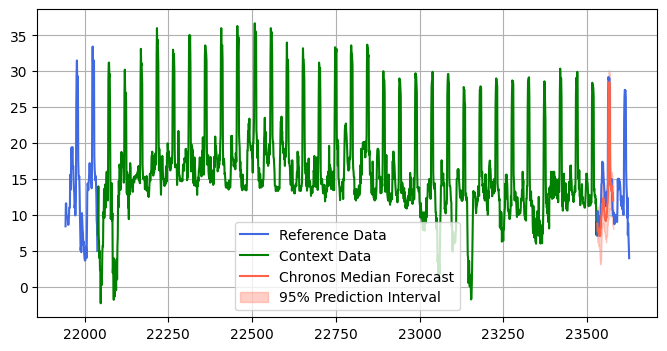

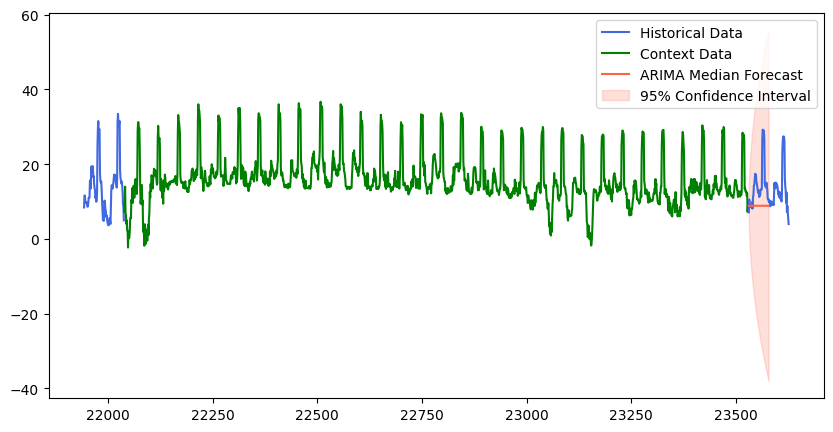

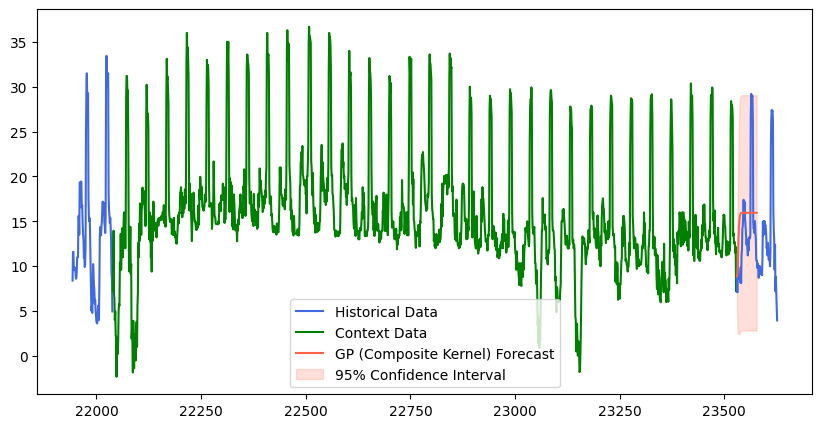

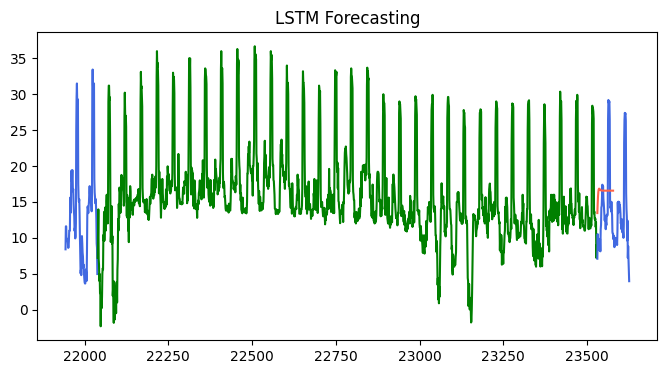


Results comparison for Price_Ex_VAT:

MSE
- chronos_tiny MSE: 6.096004467672163
- chronos_mini MSE: 10.404176675728232
- arima MSE: 63.194192159215696
- gp MSE: 30.23339008877851
- lstm MSE: 36.79085053935061
NMSE
- chronos_tiny NMSE: 0.18417858948882307
- chronos_mini NMSE: 0.3143414010094835
- arima NMSE: 1.9092861951616145
- gp NMSE: 0.9134414470242229
- lstm NMSE: 1.1115620066169727



In [15]:
start_date = '2024-01-01'
end_date = '2024-02-01'
prediction_length = 48

_ = utils.compare_prediction_methods(half_hourly_prices,data_column, date_column,start_date,end_date,prediction_length ,methods=['chronos_tiny','chronos_mini','arima','gp','lstm'],run_name="one_month")

Real World Case Study